In [66]:
import crowsetta
import hdf5storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_path = r'C:\Users\Sivan\Desktop\MSc\Cohen Lab\Data\lb4444_1_annotation_July_2019_Vika.mat'

In [104]:
def create_syl_df_from_annot_file(file_path):
    scribe = crowsetta.Transcriber(format='yarden')
    audseq = scribe.from_file(data_path)
    records = []
    for annot in audseqs[0]:
        curr_path = str(annot.audio_path)
        prev_segment = None
        for segment in annot.seq.segments:
            time_from_prev = None
            if prev_segment:
                time_from_prev = segment.onset_s - prev_segment.offset_s
            records.append(
                {
                    'path': curr_path,
                    'label': segment.label,
                    'duration': segment.offset_s - segment.onset_s,
                    'start': segment.onset_s,
                    'end': segment.offset_s,
                    'time_from_prev': time_from_prev

                }
            )
            prev_segment = segment
    return pd.DataFrame.from_records(records)


In [107]:
df = create_syl_df_from_annot_file(data_path)

In [108]:
df.head()

,path,label,duration,start,end,time_from_prev
0,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.026984,0.064762,NaN
1,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.097143,0.137619,0.032381
2,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.170000,0.207778,0.032381
3,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.242857,0.283333,0.035079
4,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.315714,0.353492,0.032381


Text(0.5, 1.0, 'labels histogram')

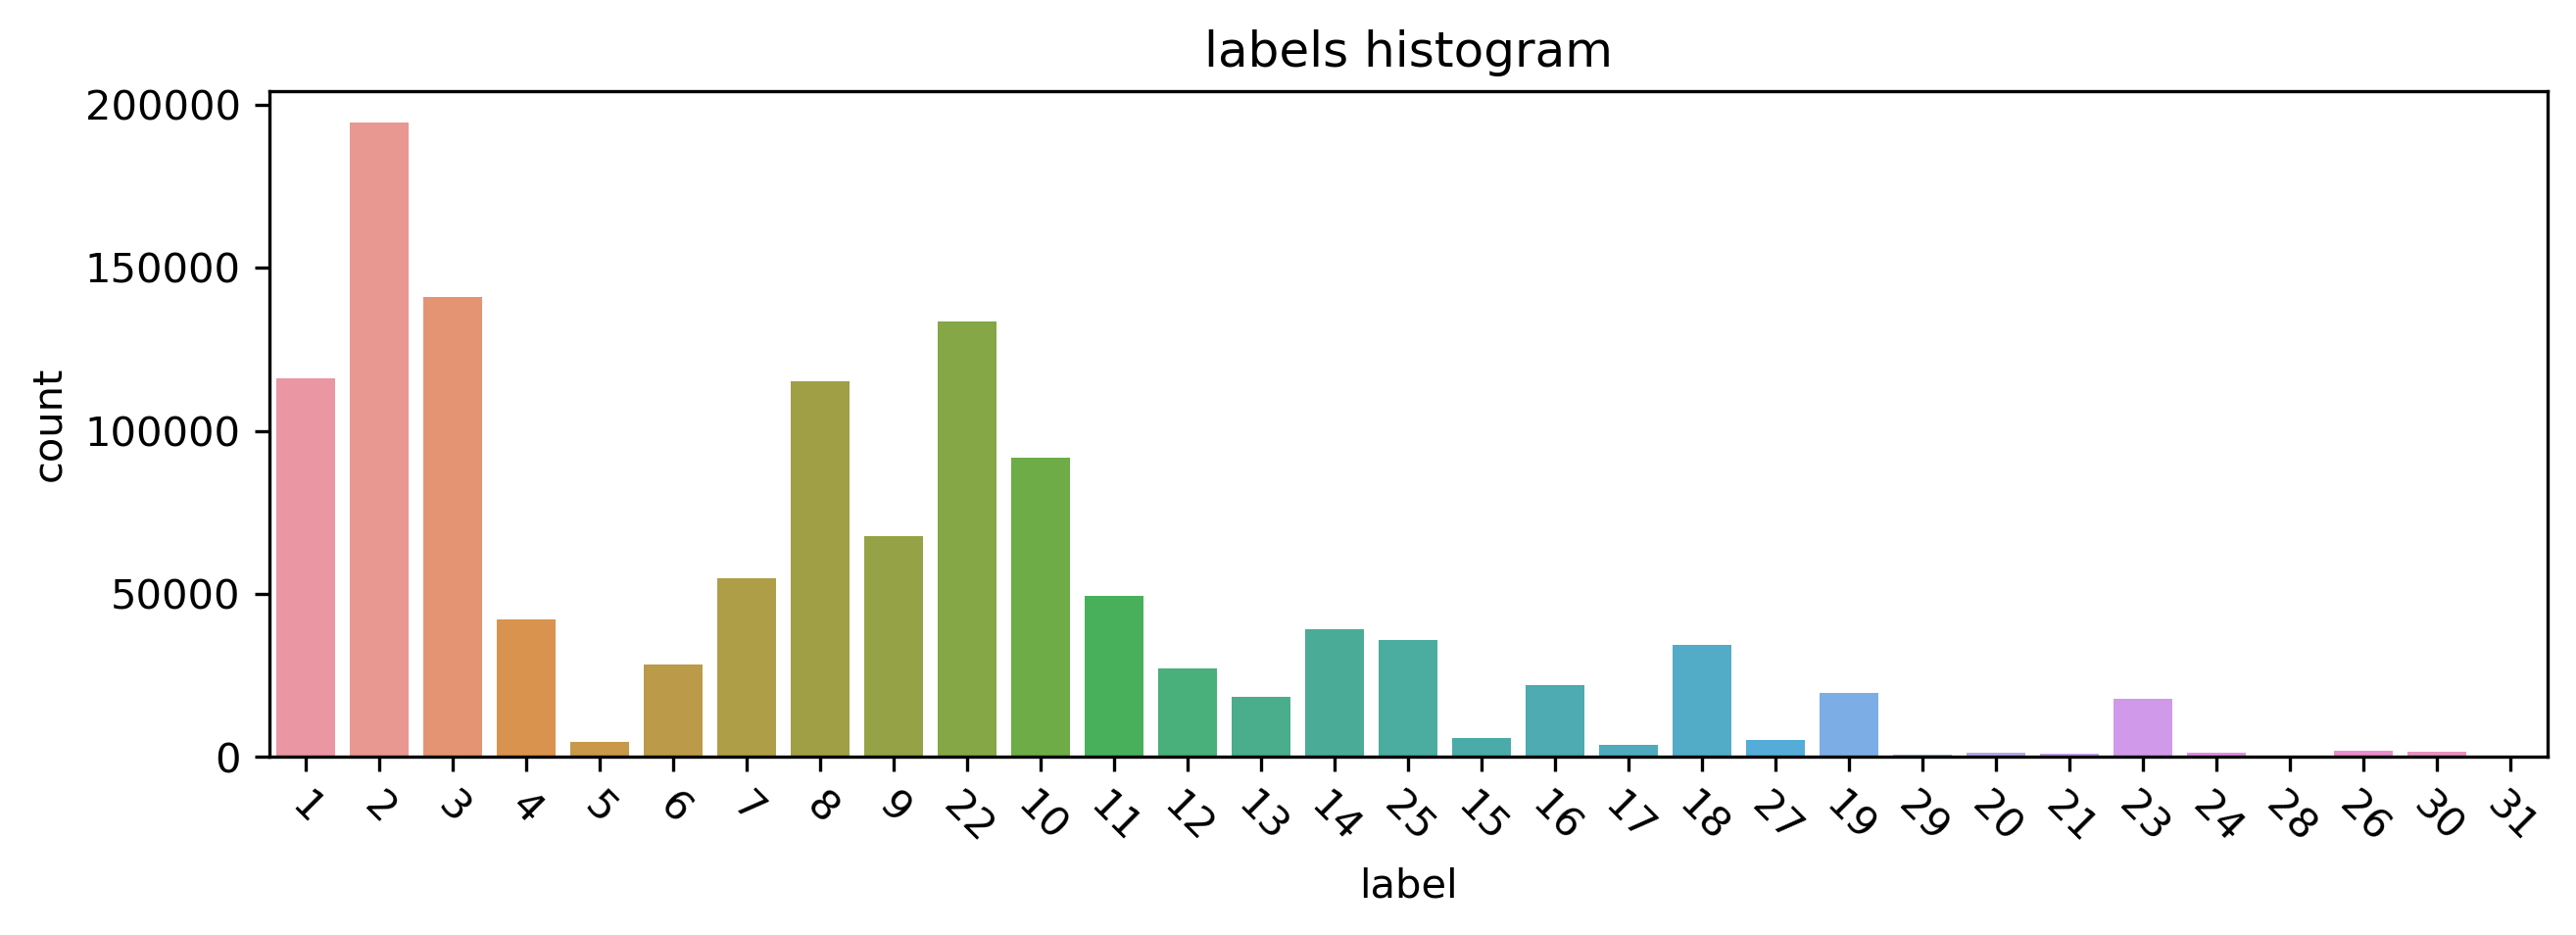

In [124]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
sns.countplot(data=df[['label']], x='label', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.set_title('labels histogram')

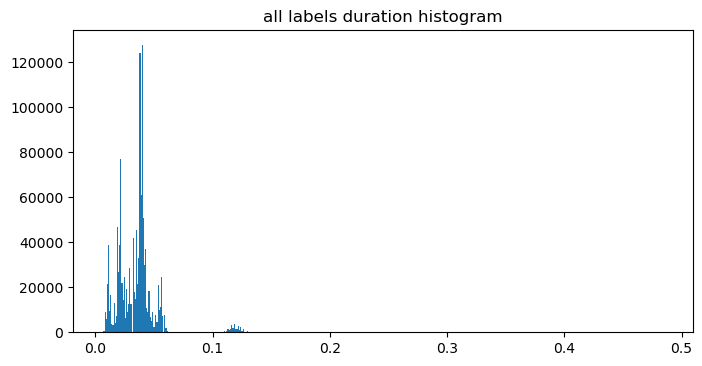

In [137]:
fig, _= plt.subplots(figsize=(8,4),dpi=100)
plt.hist(df[['duration']],bins = 500)
plt.title('all labels duration histogram')
plt.show()

Text(0.5, 1.0, 'violin plot of duration for each label')

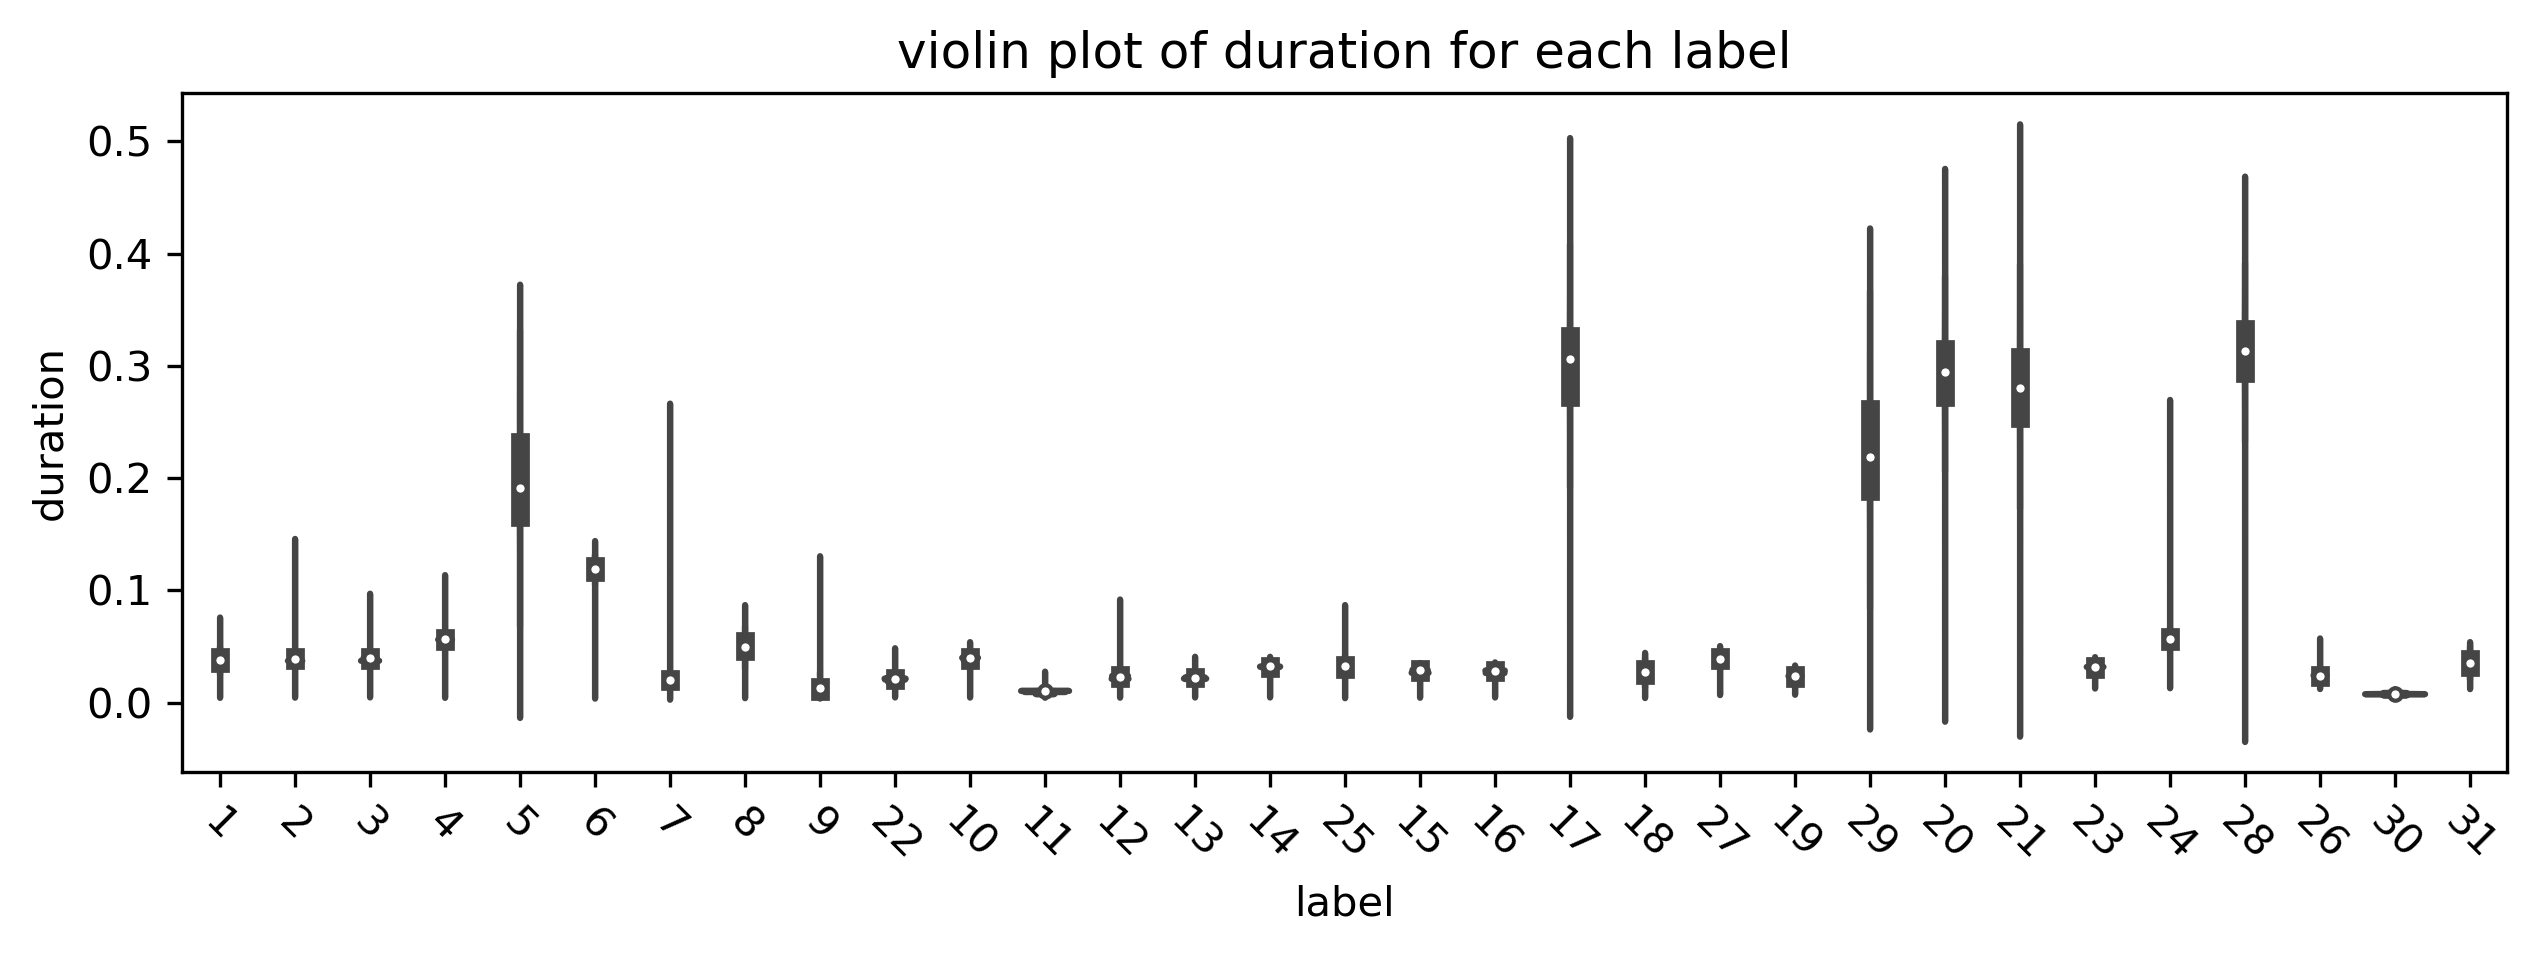

In [138]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
sns.violinplot(x ="label",y ="duration",data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.set_title('violin plot of duration for each label')